<a href="https://colab.research.google.com/github/AakashAhuja30/Machine-Learning/blob/master/RandomForest_DecisionTrees_InPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  plot_tree

In [3]:
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [8]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.columns=['age','sex','cp','restbp','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','hd']

In [11]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [13]:
 df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [17]:
len(df.loc[
           (df['ca']=='?') |
           (df['thal']=='?')
           ]
)

6

In [18]:
len(df)

303

In [19]:
df_no_missing=df.loc[
       (df['ca'] != '?') &
       (df['thal'] != '?')
]

In [20]:
len(df_no_missing)

297

In [22]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [23]:
X=df_no_missing.iloc[:,:-1]

In [24]:
X=df_no_missing.drop('hd',axis=1).copy()
y=df_no_missing['hd'].copy()

In [26]:
print(X.head())
y.head()

    age  sex   cp  restbp   chol  fbs  ...  thalach  exang  oldpeak  slope   ca thal
0  63.0  1.0  1.0   145.0  233.0  1.0  ...    150.0    0.0      2.3    3.0  0.0  6.0
1  67.0  1.0  4.0   160.0  286.0  0.0  ...    108.0    1.0      1.5    2.0  3.0  3.0
2  67.0  1.0  4.0   120.0  229.0  0.0  ...    129.0    1.0      2.6    2.0  2.0  7.0
3  37.0  1.0  3.0   130.0  250.0  0.0  ...    187.0    0.0      3.5    3.0  0.0  3.0
4  41.0  0.0  2.0   130.0  204.0  0.0  ...    172.0    0.0      1.4    1.0  0.0  3.0

[5 rows x 13 columns]


0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [27]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [28]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [29]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [30]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [31]:
X_encoded=pd.get_dummies(X, columns=[
       'cp','restecg','slope','thal'                              
])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [33]:
y.unique()

array([0, 2, 1, 3, 4])

In [35]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)

In [37]:
clf_dt= DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

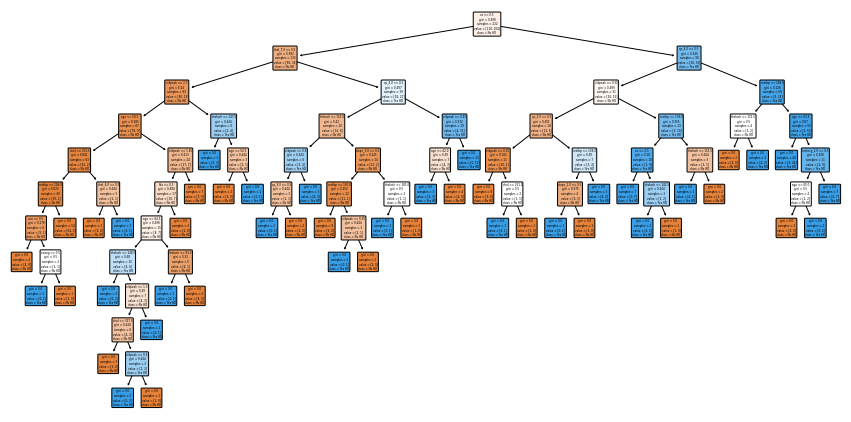

In [38]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['No HD','Yes HD'],
          feature_names=X_encoded.columns);

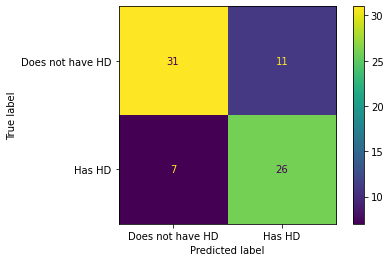

In [40]:
plot_confusion_matrix(clf_dt,X_test,y_test,
                      display_labels=['Does not have HD',
                                      'Has HD'])

In [1]:
from sklearn.datasets import  load_iris

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [11]:
iris=load_iris()

In [12]:
df=pd.DataFrame(iris.data , columns=iris.feature_names)

In [13]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris

In [17]:
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop('species',axis=1).copy()
y=df['species'].copy()

In [36]:
y=pd.factorize(y)[0]

In [35]:
t1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,
                                                 stratify=y,test_size=0.25)

In [38]:
features=df.columns[:4]
print(features)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [50]:
clf=RandomForestClassifier(n_jobs=2,random_state=0,n_estimators=50)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred=clf.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score



In [52]:
print(accuracy_score(y_test,y_pred))

0.9473684210526315
